In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('fivethirtyeight')

## 1. Exploratory Data Analysis

In [3]:
data = pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
## We dont need row number

In [7]:
data.drop(columns=["RowNumber"], inplace=True)

In [8]:
data.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


1. 'data.describe()': This function computes summary statistics for each numerical column in the DataFrame data. The statistics include count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum. This function returns a DataFrame where each row corresponds to one of these statistics, and each column represents a numerical column in the original DataFrame.
2. '.T': This transposes the DataFrame obtained from data.describe(). Transposing a DataFrame swaps its rows and columns, so the rows become columns and vice versa. This is done to make it easier to read the summary statistics, as the statistics will be displayed as rows instead of column
3. 'style.background_gradient()': This applies a background gradient to the DataFrame, where the color of each cell is determined by its numerical value. Cells with higher values will have a darker color, while cells with lower values will have a lighter color. This makes it visually easier to identify patterns and variations in the data.ata.

In summary, this code generates a visually appealing representation of the summary statistics for each numerical column in the DataFrame data, with a background gradient applied to highlight the magnitude of each statistic.

### 2.1: Null Values

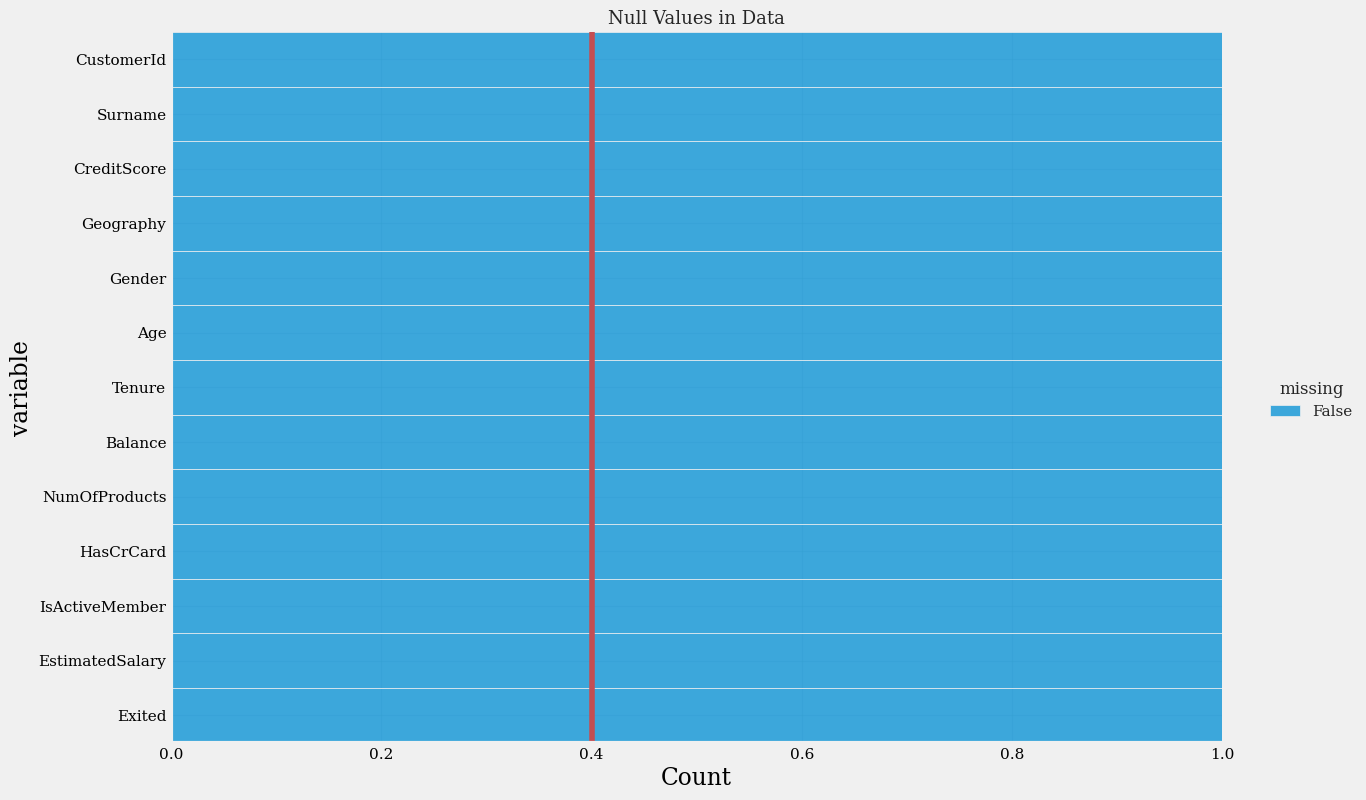

In [9]:
sns.displot(data=data.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Data', fontsize=13)
plt.show()

1. sns.displot: This function creates a distribution plot. It takes several parameters to customize the plot, such as data (the DataFrame), y (the variable to be plotted on the y-axis), hue (the variable to group by), multiple (how to draw the multiple histograms), height (the height of the plot), and aspect (the aspect ratio of the plot).
2. data=data.isnull().melt(value_name='missing'): This part of the code creates a DataFrame where each row represents a missing value in the original DataFrame data. The isnull() function converts each value in data to a boolean indicating whether it's missing or not. Then, melt() function is used to reshape the DataFrame so that each variable is in a single column, and the missing values are stacked. The parameter value_name='missing' specifies the name of the column that holds the missing values.
3. y='variable': This specifies the variable to be plotted on the y-axis, which in this case represents the column names of the original DataFrame data.
4. hue='missing': This parameter indicates that the plot will use the 'missing' column to group the data. Since 'missing' contains boolean values (True or False), this will create two groups: one for missing values and one for non-missing values.
5. multiple='fill': This parameter specifies that the histograms should be filled to represent the proportion of missing values in each column.
6. height=8: This sets the height of the plot to 8 units.
7. aspect=1.6: This sets the aspect ratio of the plot to 1.6.

After creating the distribution plot, the code adds a vertical line (plt.axvline(0.4, color='r')) at the x-coordinate 0.4 with a red color. This line represents a threshold value, potentially indicating a cutoff point for columns with a high proportion of missing values. Finally, it sets the title of the plot (plt.title('Null Values in Data', fontsize=13)) and displays the plot (plt.show()). (plt.show()).

### 2.2 Target Variable Analysis

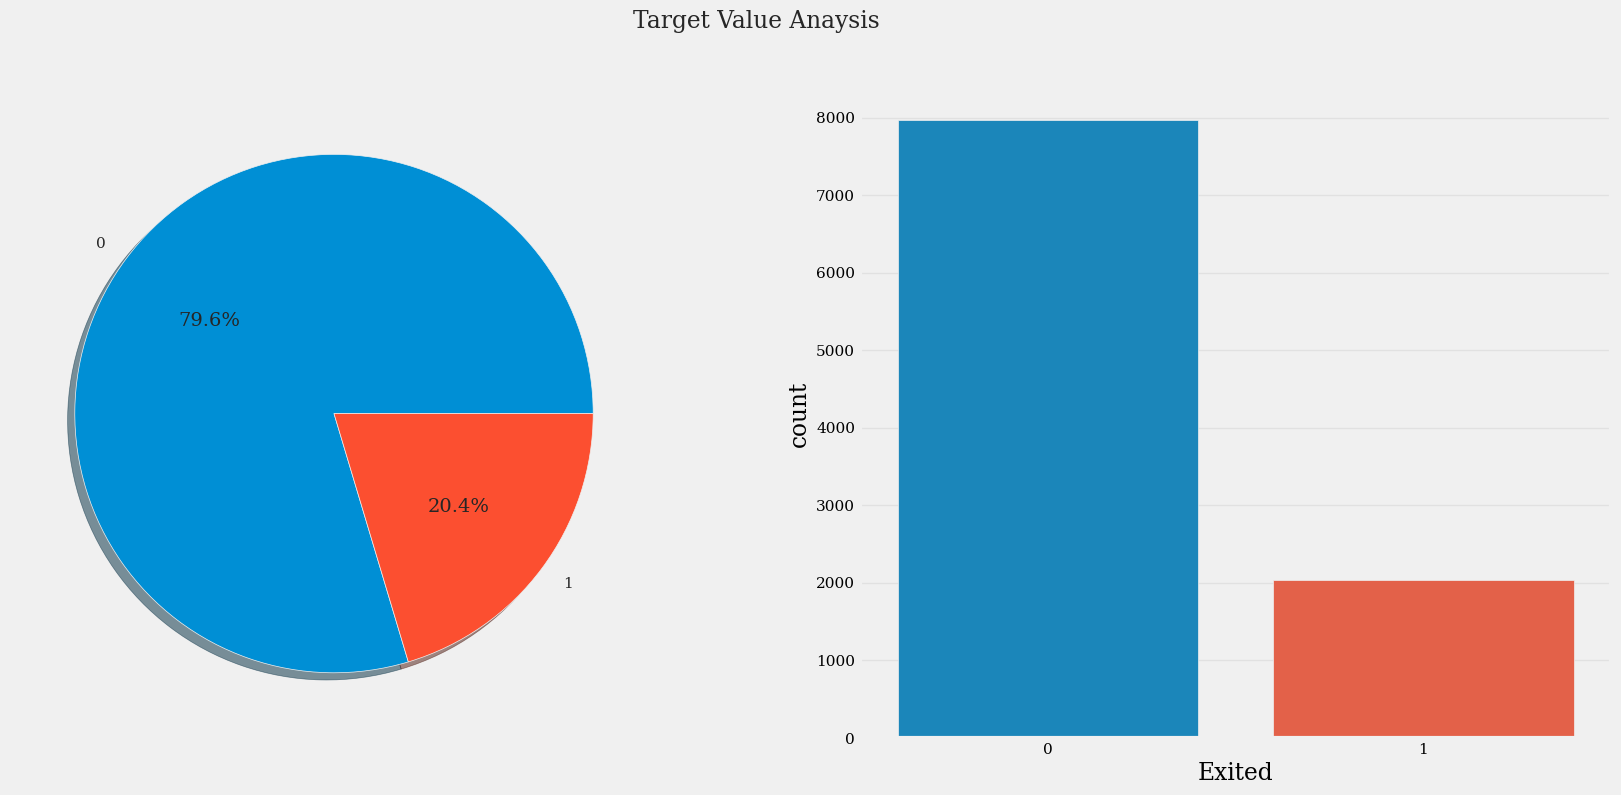

In [10]:
f,ax=plt.subplots(1,2,figsize=(19,8))
data['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=data,ax=ax[1])
plt.suptitle('Target Value Anaysis')
plt.show()

Takeaways:

    - The data is highly imbalanced. ~ 80% of our data is from class 0 (not exited) and 20% of the data is from class 1 (exited)
    - With the purpose of this project being focused on predicting when a customer is going to leave, correctly predicting class 1 will be our priority.

In [11]:
# Unique value counts for each column
unique_counts = data.nunique()
print(f'unique counts: {unique_counts}')
# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()



continuous_vars.remove('CustomerId')
categorical_vars.remove('Exited')
continuous_vars.remove('Surname')


print(f"Categorical Variables: {categorical_vars}")
print(f"Continuous/Numerical Variables: {continuous_vars}")

unique counts: CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continuous/Numerical Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [12]:
# categorical_variables = []
# continuous_numerical_variables = []

# for column in data.columns:
#     if data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(data[column]):
#         categorical_variables.append(column)
#     elif pd.api.types.is_numeric_dtype(data[column]):
#         continuous_numerical_variables.append(column)

# print("Categorical variables:", categorical_variables)
# print("Continuous numerical variables:", continuous_numerical_variables)

### Categorical Variable Analysis

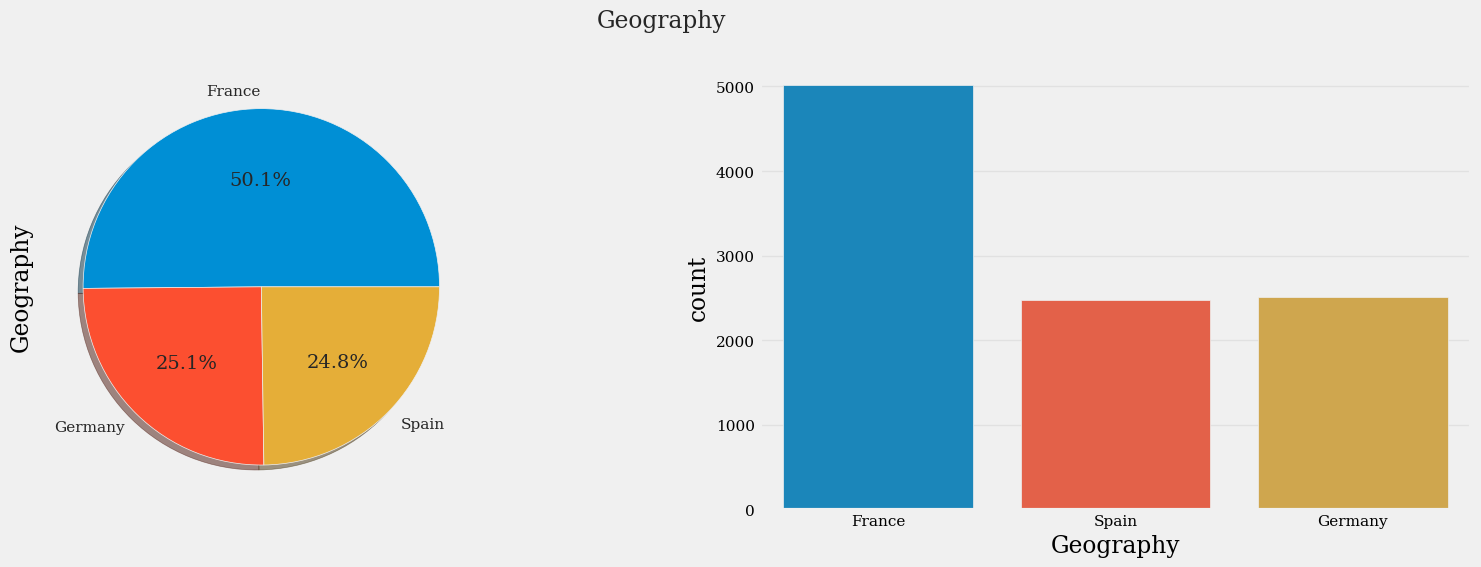

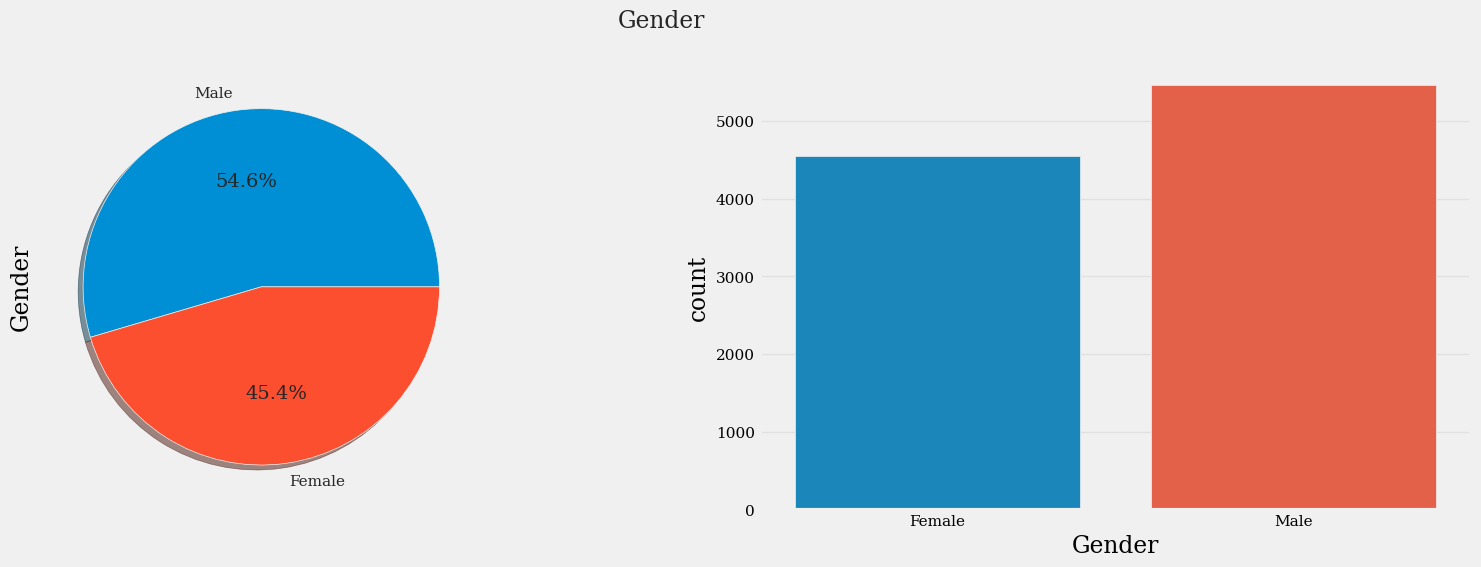

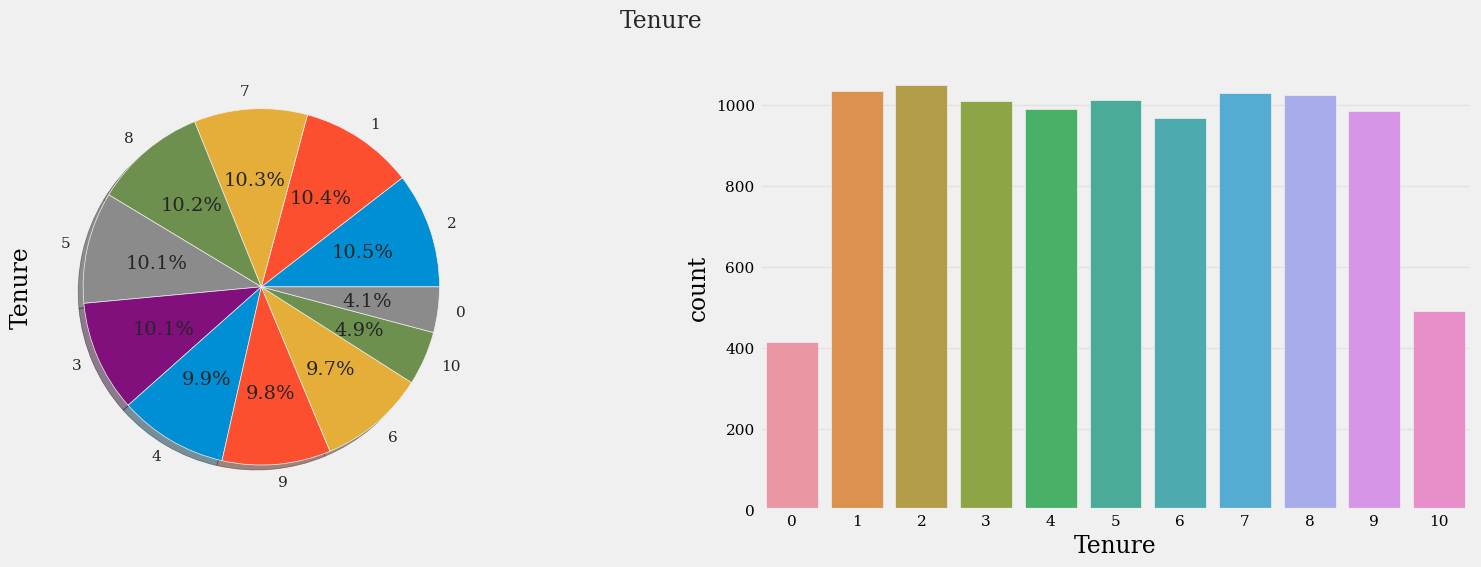

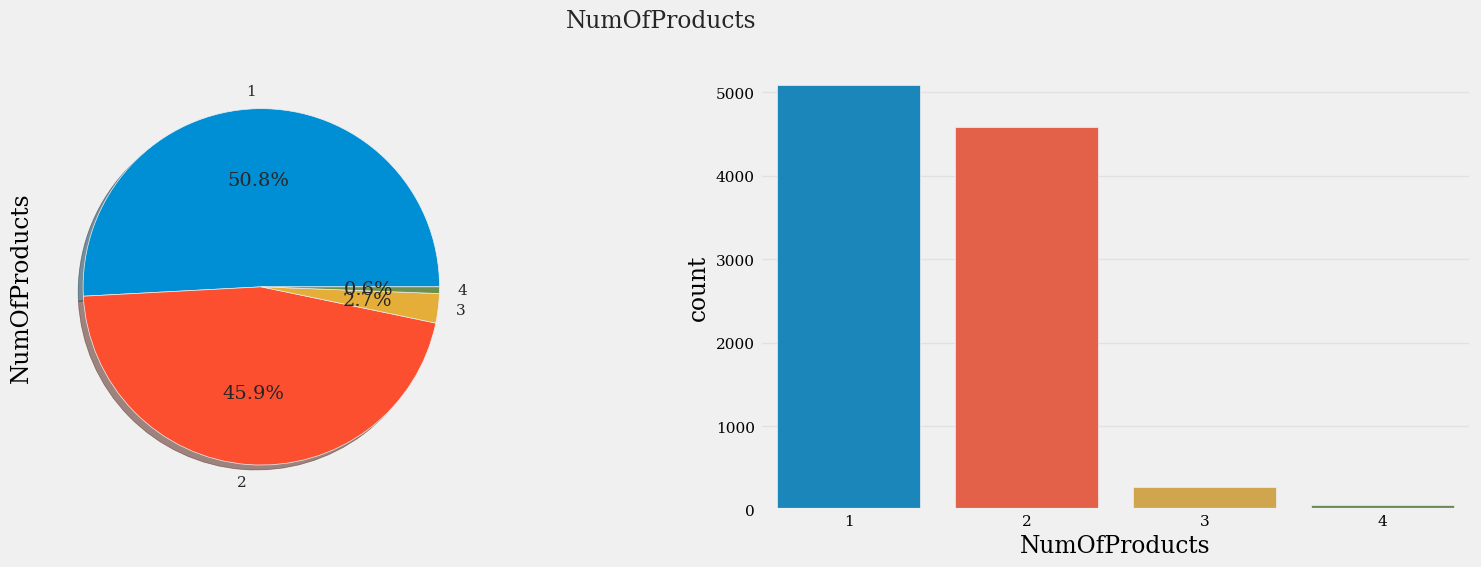

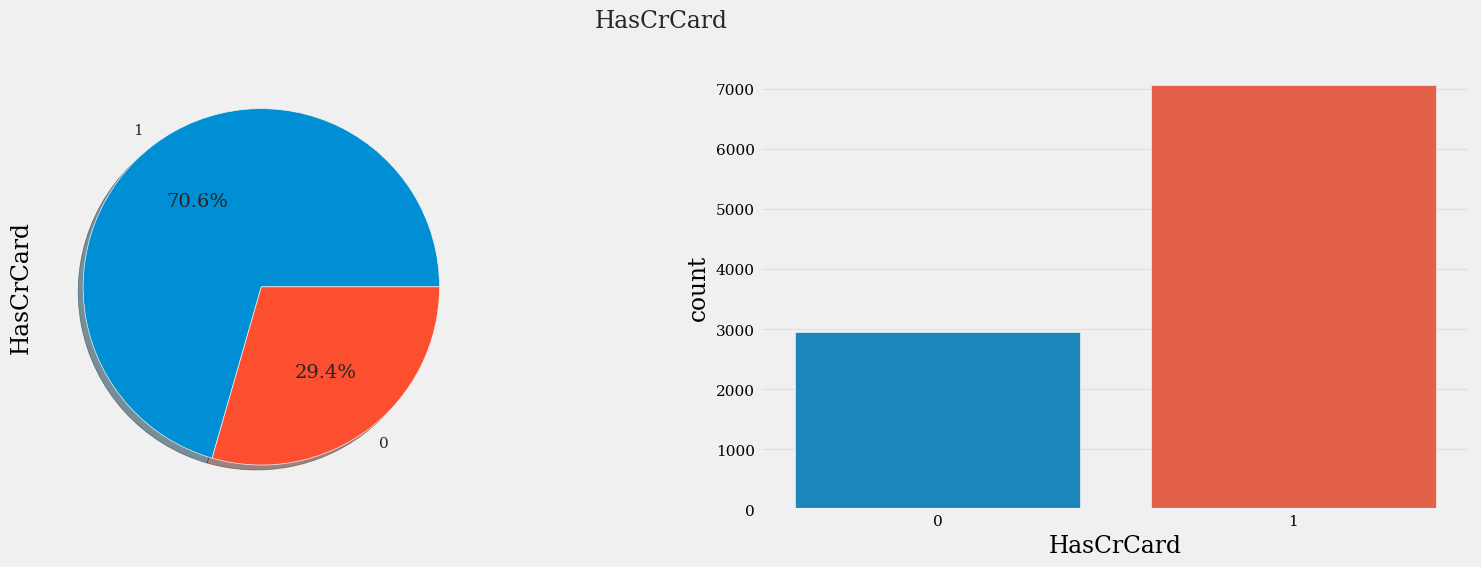

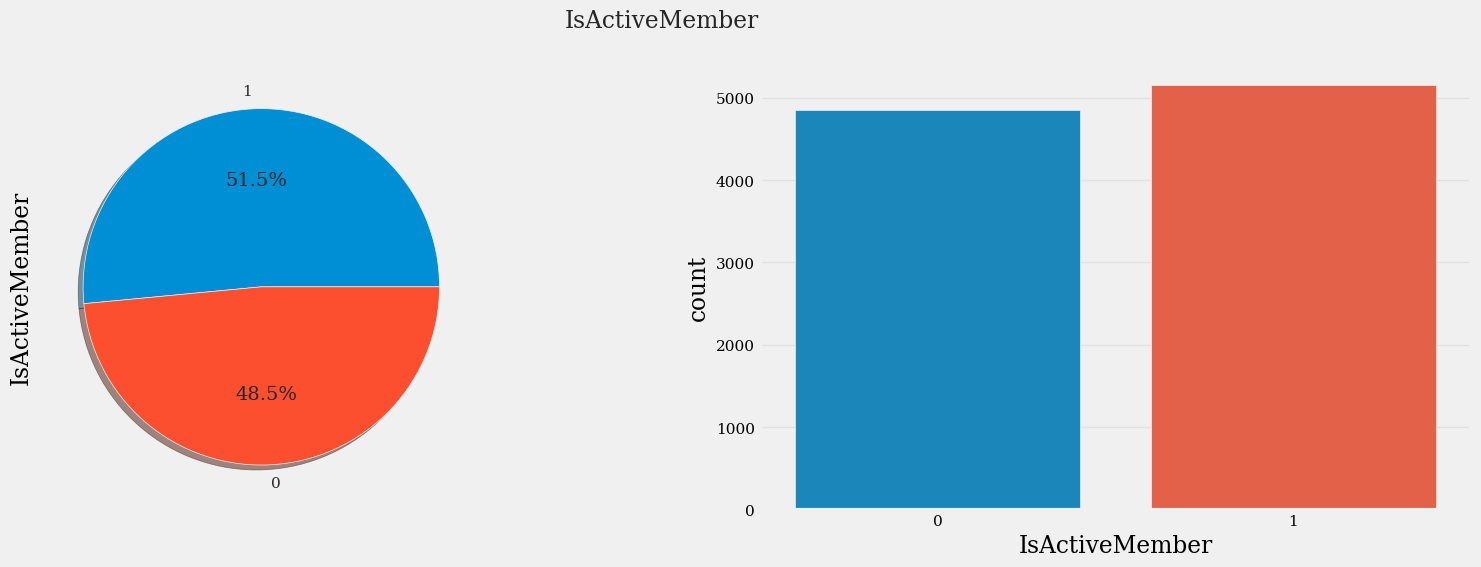

In [13]:
for var in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    data[var].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{var}')
    sns.countplot(x=var,data=data,ax=ax[1])
    plt.suptitle(f'{var}')
    plt.show()

### Numerical/Continuous Variable Analysis

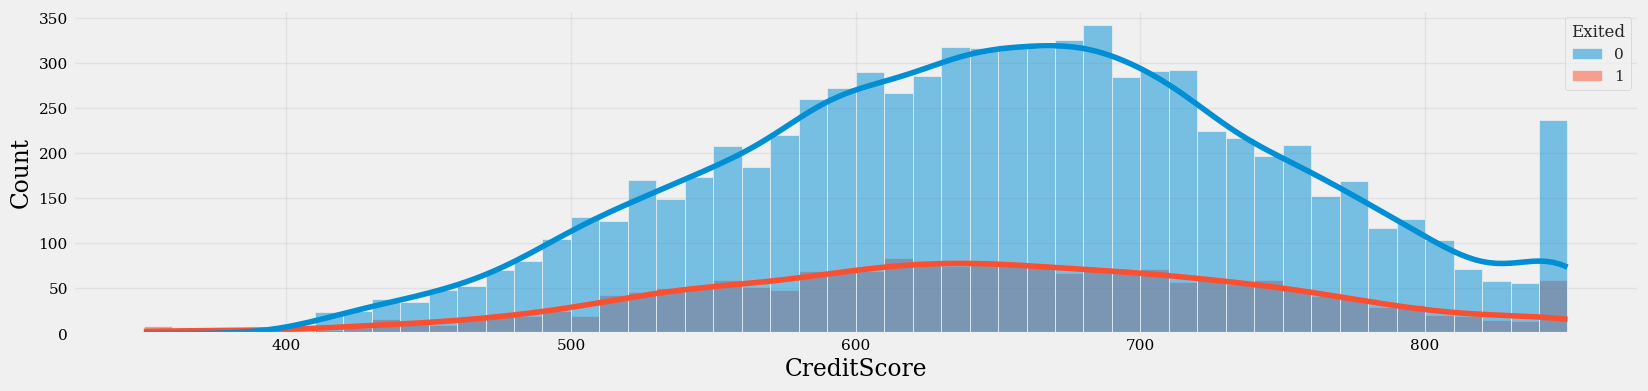

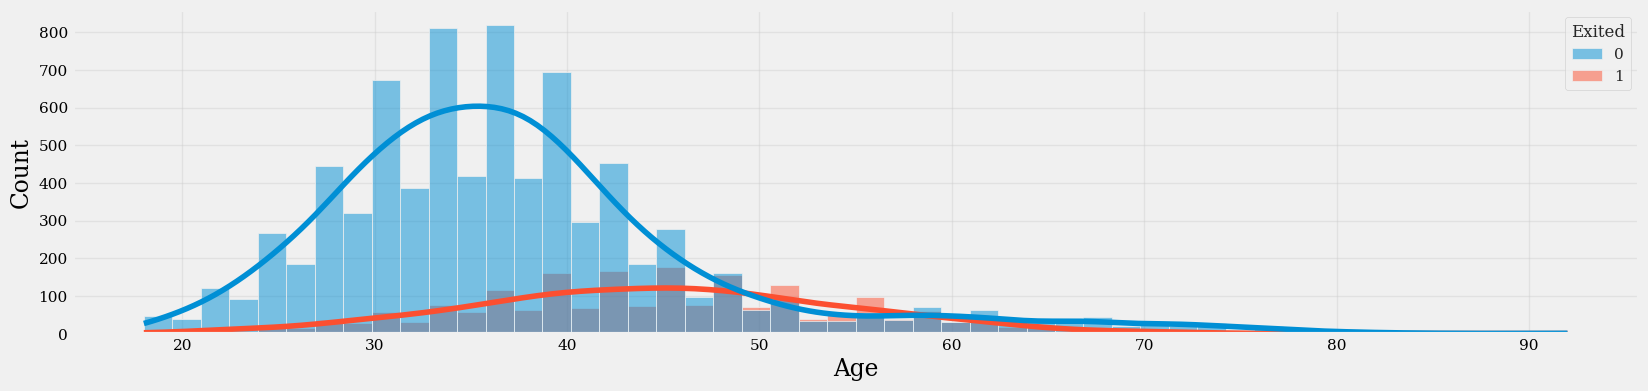

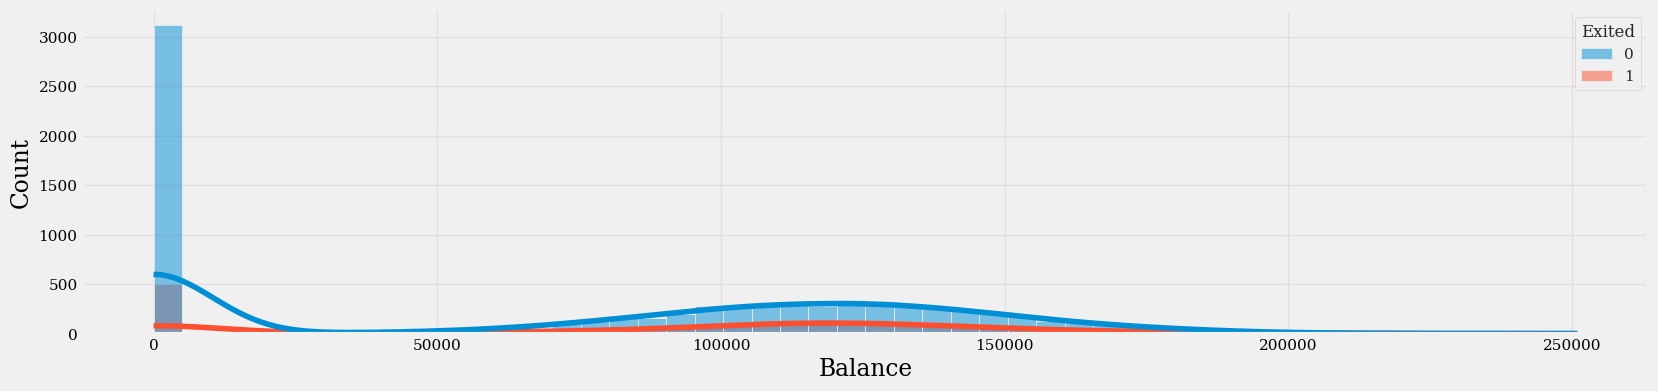

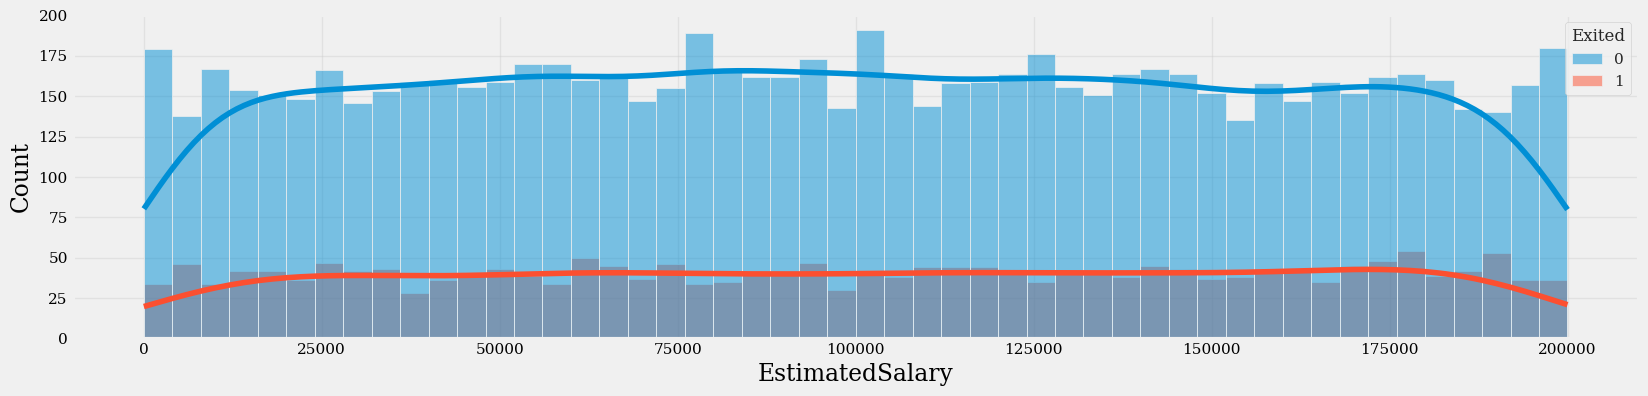

In [14]:
for var in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=var, hue="Exited", bins=50, kde=True)
    plt.show()

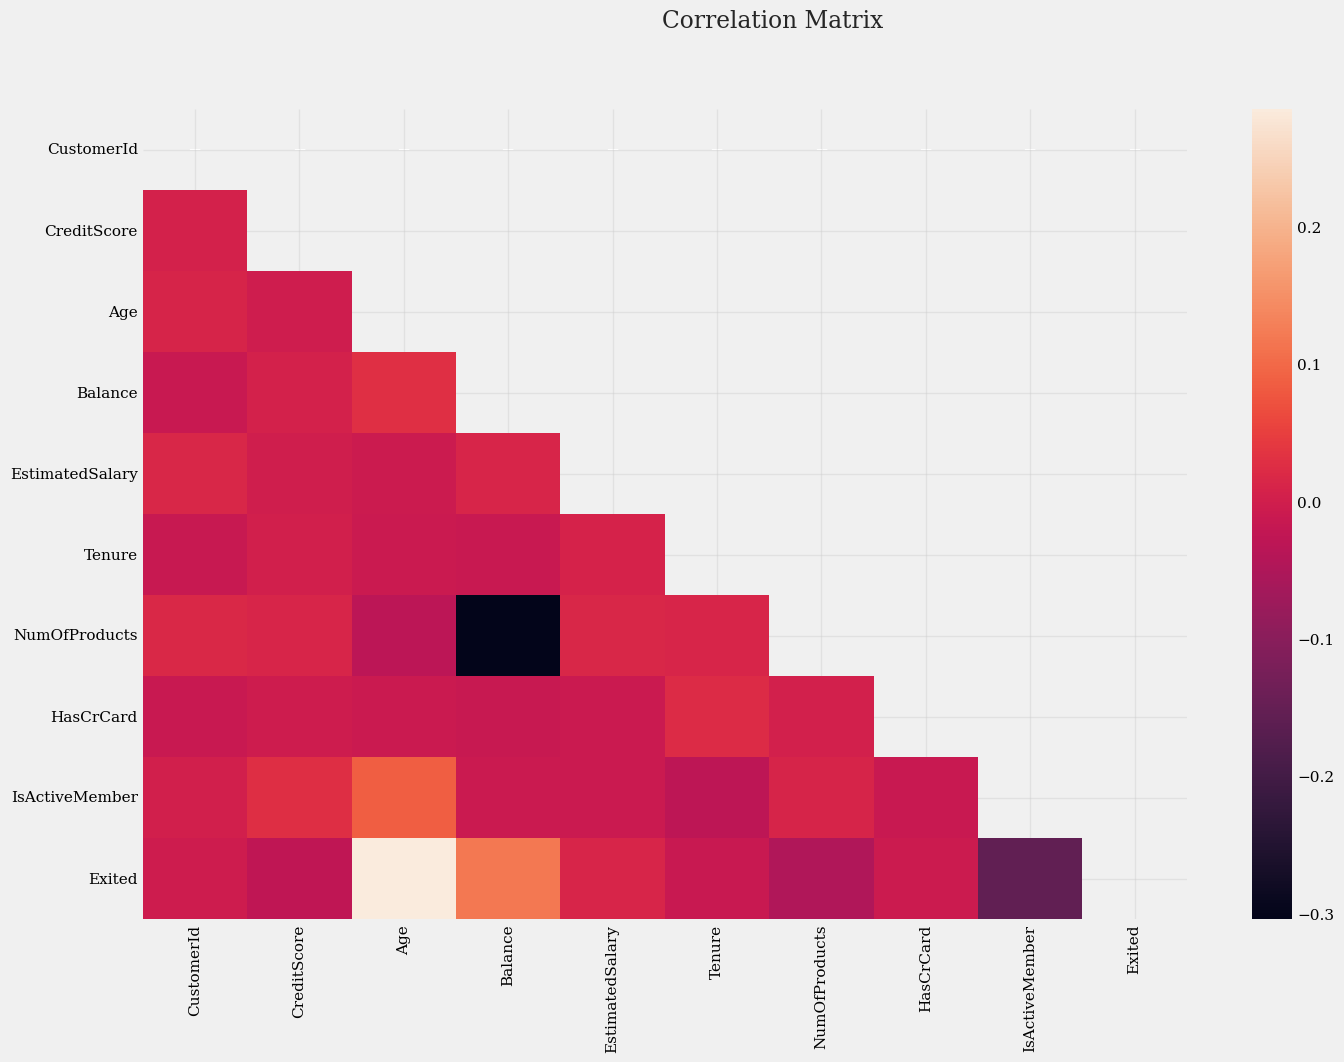

In [15]:
data2 = data[['CustomerId', 'CreditScore','Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=data2.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

## 3. Modeling 

### Overview

### 3.1: Data Preparation 

In [16]:
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [17]:
columns_to_remove = ['CustomerId', 'Surname', 'Exited']

X = data.drop(columns_to_remove, axis=1)
y = data['Exited']

In [18]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [19]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

### 3.2: Encoders

In [20]:
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts'])

In [21]:
X_encoded.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,IsActiveMember_0,IsActiveMember_1,HasCrCard_0,HasCrCard_1,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,42,2,0.00,101348.88,True,False,False,True,False,False,True,False,True,True,False,False,False
1,608,41,1,83807.86,112542.58,False,False,True,True,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,113931.57,True,False,False,True,False,True,False,False,True,False,False,True,False
3,699,39,1,0.00,93826.63,True,False,False,True,False,True,False,True,False,False,True,False,False
4,850,43,2,125510.82,79084.10,False,False,True,True,False,False,True,False,True,True,False,False,False


In [22]:
sum(y)/len(y)

0.2037

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [24]:
sum(y_train)/len(y_train)

0.20373333333333332

In [25]:
sum(y_test)/len(y_test)

0.2036

### 3.3: Create Model

In [26]:
clf_xgb_v1 = xgb.XGBClassifier(objective='binary:logistic', seed=42)

clf_xgb_v1.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='auc', eval_set = [(X_test, y_test)])

[0]	validation_0-auc:0.83879
[1]	validation_0-auc:0.84596
[2]	validation_0-auc:0.85715
[3]	validation_0-auc:0.85834
[4]	validation_0-auc:0.86066
[5]	validation_0-auc:0.86151
[6]	validation_0-auc:0.86261
[7]	validation_0-auc:0.86449
[8]	validation_0-auc:0.86557
[9]	validation_0-auc:0.86452
[10]	validation_0-auc:0.86336
[11]	validation_0-auc:0.86369
[12]	validation_0-auc:0.86443
[13]	validation_0-auc:0.86348
[14]	validation_0-auc:0.86385
[15]	validation_0-auc:0.86528
[16]	validation_0-auc:0.86547
[17]	validation_0-auc:0.86560
[18]	validation_0-auc:0.86491
[19]	validation_0-auc:0.86489
[20]	validation_0-auc:0.86521
[21]	validation_0-auc:0.86537
[22]	validation_0-auc:0.86600
[23]	validation_0-auc:0.86615
[24]	validation_0-auc:0.86505
[25]	validation_0-auc:0.86531
[26]	validation_0-auc:0.86488
[27]	validation_0-auc:0.86482
[28]	validation_0-auc:0.86436
[29]	validation_0-auc:0.86423
[30]	validation_0-auc:0.86457
[31]	validation_0-auc:0.86488
[32]	validation_0-auc:0.86418
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 3.4: Evaluate Model

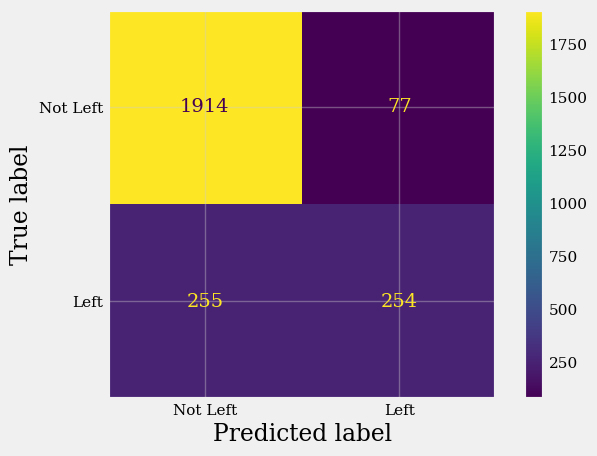

In [27]:
predictions = clf_xgb_v1.predict(X_test)

conf_m = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [28]:
accuracy = (conf_m[0,0] + conf_m[1,1]) / conf_m.sum()
print(f"Accuracy: {accuracy}")

Accuracy: 0.8672


In [29]:
# Calculate accuracy for class 0 (Not Left)
accuracy_class_0 = conf_m[0, 0] / conf_m[0, :].sum()

# Calculate accuracy for class 1 (Left)
accuracy_class_1 = conf_m[1, 1] / conf_m[1, :].sum()

print("Accuracy for class 'Not Left':", accuracy_class_0)
print("Accuracy for class 'Left':", accuracy_class_1)

Accuracy for class 'Not Left': 0.9613259668508287
Accuracy for class 'Left': 0.49901768172888017


### 3.5: Hyperparameter Tuning

In [30]:
# # Round 1

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.01, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

optimal_parameters = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=3,
    n_jobs=10,
    cv=3
)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)

print(optimal_parameters)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.74738
[1]	validation_0-auc:0.82414
[2]	validation_0-auc:0.84617
[3]	validation_0-auc:0.85284
[4]	validation_0-auc:0.85583
[5]	validation_0-auc:0.85290
[6]	validation_0-auc:0.85765
[7]	validation_0-auc:0.85606
[8]	validation_0-auc:0.85699
[9]	validation_0-auc:0.85824
[10]	validation_0-auc:0.86088
[11]	validation_0-auc:0.86207
[12]	validation_0-auc:0.86198
[13]	validation_0-auc:0.86255
[14]	validation_0-auc:0.86296
[15]	validation_0-auc:0.86246
[16]	validation_0-auc:0.86242
[17]	validation_0-auc:0.86307
[18]	validation_0-auc:0.86464
[19]	validation_0-auc:0.86565
[20]	validation_0-auc:0.86599
[21]	validation_0-auc:0.86674
[22]	validation_0-auc:0.86682
[23]	validation_0-auc:0.86786
[24]	validation_0-auc:0.86887
[25]	validation_0-auc:0.86928
[26]	validation_0-auc:0.86990
[27]	validation_0-auc:0.87041
[28]	validation_0-auc:0.87063
[29]	validation_0-auc:0.87132
[30]	validation_0-auc:0.87132
[31]	validation_0

In [31]:
print(optimal_parameters.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 5}


In [32]:
# # Round 2

param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [1.0, 1.5, 2],
    'reg_lambda': [10.0, 25.0,50.0],
    'scale_pos_weight': [5, 7, 9]
}

optimal_parameters = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=3,
    n_jobs=10,
    cv=3
)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)

print(optimal_parameters.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.74659
[1]	validation_0-auc:0.82247
[2]	validation_0-auc:0.83789
[3]	validation_0-auc:0.84697
[4]	validation_0-auc:0.85339
[5]	validation_0-auc:0.85397
[6]	validation_0-auc:0.85860
[7]	validation_0-auc:0.85686
[8]	validation_0-auc:0.85666
[9]	validation_0-auc:0.85638
[10]	validation_0-auc:0.85742
[11]	validation_0-auc:0.85955
[12]	validation_0-auc:0.86009
[13]	validation_0-auc:0.85977
[14]	validation_0-auc:0.86041
[15]	validation_0-auc:0.86065
[16]	validation_0-auc:0.86101
[17]	validation_0-auc:0.86337
[18]	validation_0-auc:0.86493
[19]	validation_0-auc:0.86406
[20]	validation_0-auc:0.86513
[21]	validation_0-auc:0.86602
[22]	validation_0-auc:0.86708
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86748
[25]	validation_0-auc:0.86792
[26]	validation_0-auc:0.86859
[27]	validation_0-auc:0.86918
[28]	validation_0-auc:0.86925
[29]	validation_0-auc:0.86937
[30]	validation_0-auc:0.86976
[31]	validation_0

In [33]:
# # Round 3

param_grid = {
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [2, 2.5, 3],
    'reg_lambda': [25.0, 50.0, 75.0],
    'scale_pos_weight': [7, 9, 11]
}

optimal_parameters = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=3,
    n_jobs=10,
    cv=3
)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)

print(optimal_parameters.best_params_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[0]	validation_0-auc:0.74434
[1]	validation_0-auc:0.82415
[2]	validation_0-auc:0.83594
[3]	validation_0-auc:0.84711
[4]	validation_0-auc:0.85130
[5]	validation_0-auc:0.85160
[6]	validation_0-auc:0.85602
[7]	validation_0-auc:0.85421
[8]	validation_0-auc:0.85446
[9]	validation_0-auc:0.85374
[10]	validation_0-auc:0.85463
[11]	validation_0-auc:0.85661
[12]	validation_0-auc:0.85740
[13]	validation_0-auc:0.85670
[14]	validation_0-auc:0.85781
[15]	validation_0-auc:0.85809
[16]	validation_0-auc:0.85832
[17]	validation_0-auc:0.86115
[18]	validation_0-auc:0.86265
[19]	validation_0-auc:0.86220
[20]	validation_0-auc:0.86339
[21]	validation_0-auc:0.86453
[22]	validation_0-auc:0.86559
[23]	validation_0-auc:0.86582
[24]	validation_0-auc:0.86581
[25]	validation_0-auc:0.86629
[26]	validation_0-auc:0.86722
[27]	validation_0-auc:0.86776
[28]	validation_0-auc:0.86778
[29]	validation_0-auc:0.86811
[30]	validation_0-auc:0.86842
[31]	validation_0

### 3.6: Tuned Models

In [35]:
## Round 1 Tuned Model
## {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 5}

clf_xgb_tuned_1 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=1.0,
                               learning_rate=0.1,
                               max_depth=3,
                               reg_lambda=0,
                               scale_pos_weight=5,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_tuned_1.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.74738
[1]	validation_0-auc:0.82414
[2]	validation_0-auc:0.84617
[3]	validation_0-auc:0.85284
[4]	validation_0-auc:0.85583
[5]	validation_0-auc:0.85290
[6]	validation_0-auc:0.85765
[7]	validation_0-auc:0.85606
[8]	validation_0-auc:0.85699
[9]	validation_0-auc:0.85824
[10]	validation_0-auc:0.86088
[11]	validation_0-auc:0.86207
[12]	validation_0-auc:0.86198
[13]	validation_0-auc:0.86255
[14]	validation_0-auc:0.86296
[15]	validation_0-auc:0.86246
[16]	validation_0-auc:0.86242
[17]	validation_0-auc:0.86307
[18]	validation_0-auc:0.86464
[19]	validation_0-auc:0.86565
[20]	validation_0-auc:0.86599
[21]	validation_0-auc:0.86674
[22]	validation_0-auc:0.86682
[23]	validation_0-auc:0.86786
[24]	validation_0-auc:0.86887
[25]	validation_0-auc:0.86928
[26]	validation_0-auc:0.86990
[27]	validation_0-auc:0.87041
[28]	validation_0-auc:0.87063
[29]	validation_0-auc:0.87132
[30]	validation_0-auc:0.87132
[31]	validation_0-auc:0.87192
[32]	validation_0-auc:0.87280
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

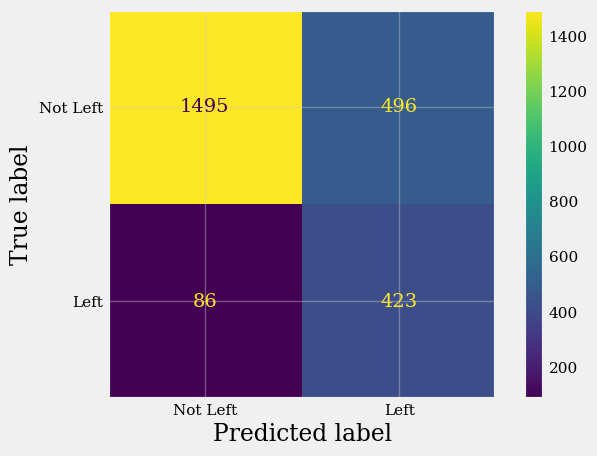

In [43]:
predictions_tuned_1 = clf_xgb_tuned_1.predict(X_test)

conf_m_t1 = confusion_matrix(y_test, predictions_tuned_1, labels=clf_xgb_tuned_1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m_t1, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [44]:
accuracy = (conf_m_t1[0,0] + conf_m_t1[1,1]) / conf_m_t1.sum()
print(f"Accuracy: {accuracy}")

Accuracy: 0.7672


In [45]:
# Calculate accuracy for class 0 (Not Left)
accuracy_class_0 = conf_m_t1[0, 0] / conf_m_t1[0, :].sum()

# Calculate accuracy for class 1 (Left)
accuracy_class_1 = conf_m_t1[1, 1] / conf_m_t1[1, :].sum()

print("Accuracy for class 'Not Left':", accuracy_class_0)
print("Accuracy for class 'Left':", accuracy_class_1)

Accuracy for class 'Not Left': 0.7508789552988449
Accuracy for class 'Left': 0.831041257367387


In [55]:
# Calculate TP, FP, FN for each class
TP = conf_m_t1[1, 1]  # True Positives
FP = conf_m_t1[0, 1]  # False Positives
FN = conf_m_t1[1, 0]  # False Negatives

# Calculate Precision, Recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.4602829162132753
Recall: 0.831041257367387
F1 Score: 0.592436974789916


In [41]:
## Round 2 Tuned Model
## {'gamma': 2, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 50.0, 'scale_pos_weight': 7}

clf_xgb_tuned_2 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=2,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=50.0,
                               scale_pos_weight=7,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_tuned_2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.74659
[1]	validation_0-auc:0.82247
[2]	validation_0-auc:0.83789
[3]	validation_0-auc:0.84697
[4]	validation_0-auc:0.85339
[5]	validation_0-auc:0.85397
[6]	validation_0-auc:0.85860
[7]	validation_0-auc:0.85686
[8]	validation_0-auc:0.85666
[9]	validation_0-auc:0.85638
[10]	validation_0-auc:0.85742
[11]	validation_0-auc:0.85955
[12]	validation_0-auc:0.86009
[13]	validation_0-auc:0.85977
[14]	validation_0-auc:0.86041
[15]	validation_0-auc:0.86065
[16]	validation_0-auc:0.86101
[17]	validation_0-auc:0.86337
[18]	validation_0-auc:0.86493
[19]	validation_0-auc:0.86406
[20]	validation_0-auc:0.86513
[21]	validation_0-auc:0.86602
[22]	validation_0-auc:0.86708
[23]	validation_0-auc:0.86724
[24]	validation_0-auc:0.86748
[25]	validation_0-auc:0.86792
[26]	validation_0-auc:0.86859
[27]	validation_0-auc:0.86918
[28]	validation_0-auc:0.86925
[29]	validation_0-auc:0.86937
[30]	validation_0-auc:0.86976
[31]	validation_0-auc:0.87090
[32]	validation_0-auc:0.87123
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

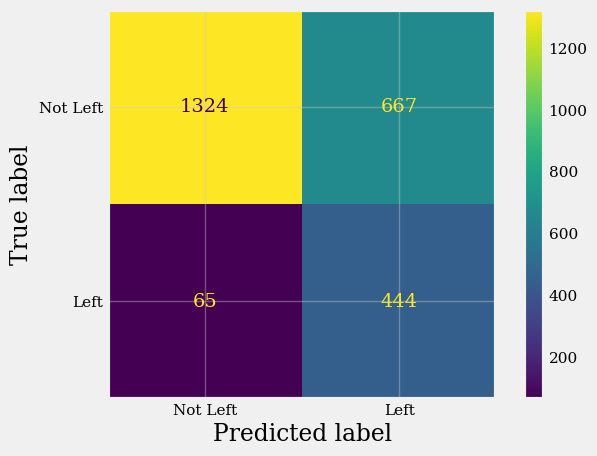

In [46]:
predictions_tuned_2 = clf_xgb_tuned_2.predict(X_test)

conf_m_t2 = confusion_matrix(y_test, predictions_tuned_2, labels=clf_xgb_tuned_2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m_t2, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [47]:
accuracy = (conf_m_t2[0,0] + conf_m_t2[1,1]) / conf_m_t2.sum()
print(f"Accuracy: {accuracy}")

Accuracy: 0.7072


In [48]:
# Calculate accuracy for class 0 (Not Left)
accuracy_class_0 = conf_m_t2[0, 0] / conf_m_t2[0, :].sum()

# Calculate accuracy for class 1 (Left)
accuracy_class_1 = conf_m_t2[1, 1] / conf_m_t2[1, :].sum()

print("Accuracy for class 'Not Left':", accuracy_class_0)
print("Accuracy for class 'Left':", accuracy_class_1)

Accuracy for class 'Not Left': 0.6649924660974385
Accuracy for class 'Left': 0.8722986247544204


In [54]:
# Calculate TP, FP, FN for each class
TP = conf_m_t2[1, 1]  # True Positives
FP = conf_m_t2[0, 1]  # False Positives
FN = conf_m_t2[1, 0]  # False Negatives

# Calculate Precision, Recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.3996399639963996
Recall: 0.8722986247544204
F1 Score: 0.5481481481481482


In [49]:
## Round 3 Tuned Model
## {'gamma': 2.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 50.0, 'scale_pos_weight': 9}

clf_xgb_tuned_3 = xgb.XGBClassifier(seed=42,
                               objective='binary:logistic',
                               gamma=2.5,
                               learning_rate=0.1,
                               max_depth=5,
                               reg_lambda=50.0,
                               scale_pos_weight=9,
                               subsample=0.9,
                               colsample_bytree=0.5)

clf_xgb_tuned_3.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.74434
[1]	validation_0-auc:0.82415
[2]	validation_0-auc:0.83594
[3]	validation_0-auc:0.84711
[4]	validation_0-auc:0.85130
[5]	validation_0-auc:0.85160
[6]	validation_0-auc:0.85602
[7]	validation_0-auc:0.85421
[8]	validation_0-auc:0.85446
[9]	validation_0-auc:0.85374
[10]	validation_0-auc:0.85463
[11]	validation_0-auc:0.85661
[12]	validation_0-auc:0.85740
[13]	validation_0-auc:0.85670
[14]	validation_0-auc:0.85781
[15]	validation_0-auc:0.85809
[16]	validation_0-auc:0.85832
[17]	validation_0-auc:0.86115
[18]	validation_0-auc:0.86265
[19]	validation_0-auc:0.86220
[20]	validation_0-auc:0.86339
[21]	validation_0-auc:0.86453
[22]	validation_0-auc:0.86559
[23]	validation_0-auc:0.86582
[24]	validation_0-auc:0.86581
[25]	validation_0-auc:0.86629
[26]	validation_0-auc:0.86722
[27]	validation_0-auc:0.86776
[28]	validation_0-auc:0.86778
[29]	validation_0-auc:0.86811
[30]	validation_0-auc:0.86842
[31]	validation_0-auc:0.86954
[32]	validation_0-auc:0.86977
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

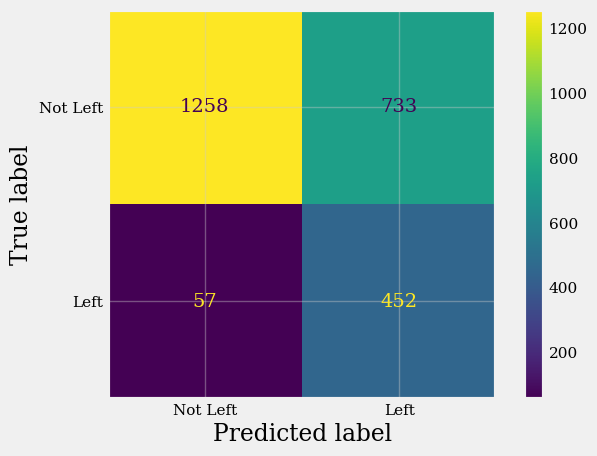

In [50]:
predictions_tuned_3 = clf_xgb_tuned_3.predict(X_test)

conf_m_t3 = confusion_matrix(y_test, predictions_tuned_3, labels=clf_xgb_tuned_3.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m_t3, display_labels=['Not Left', 'Left'])
disp.plot()
plt.show()

In [51]:
accuracy = (conf_m_t3[0,0] + conf_m_t3[1,1]) / conf_m_t3.sum()
print(f"Accuracy: {accuracy}")

Accuracy: 0.684


In [52]:
# Calculate accuracy for class 0 (Not Left)
accuracy_class_0 = conf_m_t3[0, 0] / conf_m_t3[0, :].sum()

# Calculate accuracy for class 1 (Left)
accuracy_class_1 = conf_m_t3[1, 1] / conf_m_t3[1, :].sum()

print("Accuracy for class 'Not Left':", accuracy_class_0)
print("Accuracy for class 'Left':", accuracy_class_1)

Accuracy for class 'Not Left': 0.6318432948267202
Accuracy for class 'Left': 0.888015717092338


In [53]:
# Calculate TP, FP, FN for each class
TP = conf_m_t3[1, 1]  # True Positives
FP = conf_m_t3[0, 1]  # False Positives
FN = conf_m_t3[1, 0]  # False Negatives

# Calculate Precision, Recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.38143459915611816
Recall: 0.888015717092338
F1 Score: 0.5336481700118064
